# Data Preparation for classifying Fake News with a Convolutional Neural Network

In [1]:
import collections
import numpy as np
import pandas as pd
import re

from argparse import Namespace
from matplotlib import pyplot as plt

In [6]:
args = Namespace(
    raw_dataset_csv="../data/original/fake_or_real_news.csv",
    train_proportion=0.7,
    val_proportion=0.15,
    test_proportion=0.15,
    output_munged_csv="../data/processed/fake_or_real_news_with_splits.csv",
    seed=1337
)

In [7]:
# Read raw data
news = pd.read_csv(args.raw_dataset_csv, header=0)
news['text'] = news['title'] + ". " + news['text']
news.rename(columns={"label":"category"}, inplace=True)
news.drop(axis=1, columns=["title"], inplace=True)
news

,id,text,category
0,8476,You Can Smell Hillary’s Fear. Daniel Greenfiel...,FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy. U...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,875,The Battle of New York: Why This Primary Matte...,REAL
...,...,...,...
6330,4490,State Department says it can't find emails fro...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...",REAL


In [8]:
# Splitting train by category
# Create dict
by_label = collections.defaultdict(list)
for _, row in news.iterrows():
    by_label[row.category].append(row.to_dict())

In [9]:
# Create split data
final_list = []
np.random.seed(args.seed)
for _, item_list in sorted(by_label.items()):
    np.random.shuffle(item_list)
    n = len(item_list)
    n_train = int(args.train_proportion*n)
    n_val = int(args.val_proportion*n)
    n_test = int(args.test_proportion*n)
    
    # Give data point a split attribute
    for item in item_list[:n_train]:
        item['split'] = 'train'
    for item in item_list[n_train:n_train+n_val]:
        item['split'] = 'val'
    for item in item_list[n_train+n_val:]:
        item['split'] = 'test'  
    
    # Add to final list
    final_list.extend(item_list)

In [10]:
# Write split data to file
final_news = pd.DataFrame(final_list)

In [11]:
final_news.split.value_counts()

train    4433
test      953
val       949
Name: split, dtype: int64

In [12]:
final_news.head()

,id,text,category,split
0,9051,“Nothing Good Can Come of This Election”–and T...,FAKE,train
1,9166,Russia And Syria Blamed For Idlib Bombing Hoax...,FAKE,train
2,7053,The Globalization Of Media: A Failing Strike F...,FAKE,train
3,10139,Microsoft Outlook to introduce ‘Hillary’ butto...,FAKE,train
4,7639,Remember This When You Talk About Standing Roc...,FAKE,train


In [19]:
# Write munged data to CSV
final_news.to_csv(args.output_munged_csv, index=False)

,id,text,category,split,length
0,9051,“Nothing Good Can Come of This Election”–and T...,FAKE,train,3545
1,9166,Russia And Syria Blamed For Idlib Bombing Hoax...,FAKE,train,3567
2,7053,The Globalization Of Media: A Failing Strike F...,FAKE,train,10344
3,10139,Microsoft Outlook to introduce ‘Hillary’ butto...,FAKE,train,2209
4,7639,Remember This When You Talk About Standing Roc...,FAKE,train,6971
...,...,...,...,...,...
6330,3341,The real reason the State Dept is Twitter figh...,REAL,test,8044
6331,4529,Chattanooga shooting proves it's time to arm o...,REAL,test,2270
6332,2624,Netanyahu warns Iran deal could 'threaten the ...,REAL,test,6147
6333,1214,South Carolina Black Voters Not Feelin’ the Be...,REAL,test,3932


<function matplotlib.pyplot.show(close=None, block=None)>

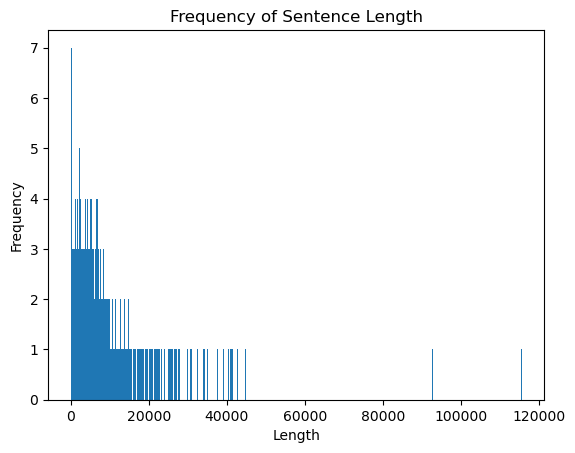

In [20]:
final_news['length'] = final_news['text'].apply(lambda x: len(x))
len_train = final_news.groupby('length').count()

sent_length = len_train.index.tolist()
sent_freq = len_train['text'].tolist()
display(final_news)
# 绘制句子长度及出现频数统计图
plt.bar(sent_length, sent_freq,120)
plt.title("Frequency of Sentence Length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show